In [1]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, brier_score_loss

In [2]:
train_df = pd.read_csv("../data/processed/train.csv").drop(columns=["BOUT_ID", "EVENT_ID", "DATE", "BOUT_ORDINAL"])
test_df = pd.read_csv("../data/processed/test.csv").drop(columns=["BOUT_ID", "EVENT_ID", "DATE", "BOUT_ORDINAL"])

test_df = test_df.loc[test_df["RED_WIN"].notnull()]

X_train = train_df.drop(columns=["RED_WIN"])
y_train = train_df["RED_WIN"]
X_test = test_df.drop(columns=["RED_WIN"])
y_test = test_df["RED_WIN"]

In [26]:
clf = LGBMClassifier(num_leaves=3, max_depth=7)
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2224, number of negative: 1639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10935
[LightGBM] [Info] Number of data points in the train set: 3863, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.575718 -> initscore=0.305221
[LightGBM] [Info] Start training from score 0.305221


LGBMClassifier(max_depth=7, num_leaves=3)

In [27]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]
log_loss(y_test, y_pred_prob)

0.6275027049912731

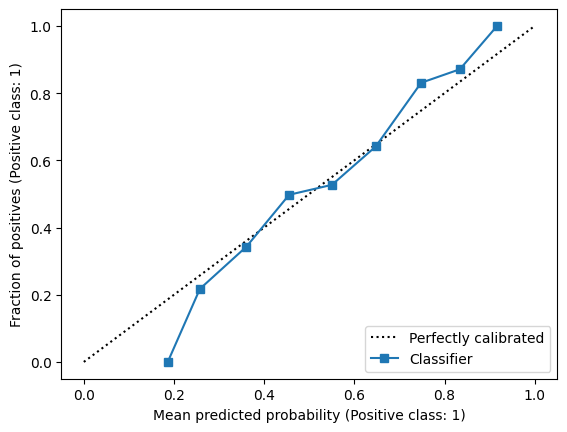

In [28]:
from sklearn.calibration import CalibrationDisplay

disp = CalibrationDisplay.from_predictions(y_test, y_pred_prob, n_bins=10)